### Data Science in Psychology

- In this .ipynb we use Python to gather, analyse and explore the results from a widely used vocational test (Holland)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# My answers
circuladas = '1,2,3,4,8,9,10,13,14,15,16,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,43,44,45,46,47,51,52,53,56,57,58,61,62,63,68,70,71,73,74,75,79,81,87,89,90'.split(',')
categorias = 'R,I,A,S,E,C'.split(',')

In [3]:
puntajes = {cat: len([p for p in circuladas if int(p) in [i for i in range(categorias.index(cat) + 1, 91, 6)]]) for cat in categorias}

In [4]:
puntajes

{'R': 9, 'I': 11, 'A': 12, 'S': 10, 'E': 6, 'C': 3}

<!-- TEASER_END -->

In [5]:
# Some sample data

nombres = 'mati, giuli, fer v, mago, consu, delfi, meli, fer p, peter'.split(', ')

data = np.array([
    [9, 11, 12, 10, 6, 3],
    [12, 14, 12, 14, 12, 12],
    [11, 9, 6, 8, 7, 7],
    [1, 13, 6, 10, 7, 0], 
    [6, 7, 0, 7, 4, 8],
    [2, 7, 4, 11, 7, 9],
    [3, 9,7,13, 8, 9],
    [3, 7, 5, 7, 6, 1],
    [5, 6, 2, 4, 2, 2]] 
)

In [6]:
df = pd.DataFrame(data, columns = categorias, index = nombres)

In [7]:
df.describe().round(1)

,R,I,A,S,E,C
count,9.0,9.0,9.0,9.0,9.0,9.0
mean,5.8,9.2,6.0,9.3,6.6,5.7
std,4.0,2.9,4.0,3.2,2.7,4.2
min,1.0,6.0,0.0,4.0,2.0,0.0
25%,3.0,7.0,4.0,7.0,6.0,2.0
50%,5.0,9.0,6.0,10.0,7.0,7.0
75%,9.0,11.0,7.0,11.0,7.0,9.0
max,12.0,14.0,12.0,14.0,12.0,12.0


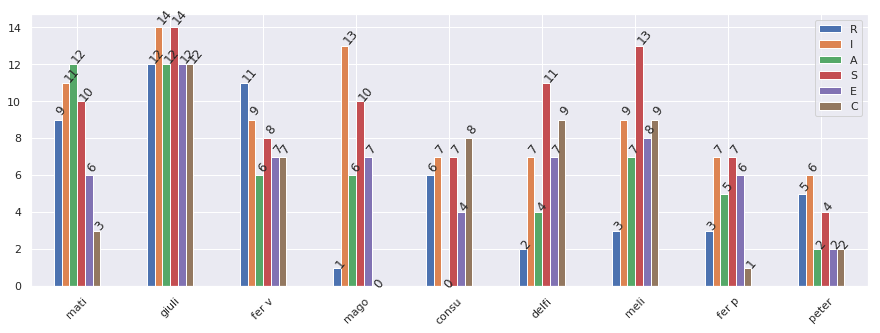

In [8]:
sns.set(rc={'figure.figsize':(15,5)})
ax = df.plot.bar()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.0, p.get_height() * 1.04), rotation=50)
    
plt.xticks(rotation=45);

In [9]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
py.offline.init_notebook_mode(connected=True)

In [10]:
data = [go.Scatterpolar(
      r = df.iloc[i].values,
      theta = df.columns,
      fill = 'toself', 
      name = df.index[i],
      hovertemplate = '%{r}'
    ) for i in range(df.shape[0])]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = False,
    )
  ),
  showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [11]:
n_person = 0
serie = df.loc[:, list('AIRCES')].iloc[n_person]
tipo = serie.idxmax()
diferenciacion = serie.max() - serie.min()

In [12]:
fig = make_subplots(rows=1, cols=2, 
                   specs=[[{"type": "xy"}, {"type": "polar"}]])

fig.add_trace(
    go.Scatterpolar(
      r = serie.values,
      theta = serie.index,
      fill = 'toself',
      name = serie.name,
      hovertemplate = '%{r}',
      hoverlabel = dict(font=dict(size=20)), 
     ),
    row=1, col=2
)

serie.sort_values(ascending=False, inplace=True)

fig.add_trace(
    go.Bar(
    x= serie.index, 
    y= serie.values, 
    hovertemplate = '%{y}',
    hoverlabel = dict(font=dict(size=20)), 
    name = serie.name,
    marker={'color':serie.values, 'colorscale': 'Blues'}
    ),
    row=1, col=1
)

fig.update_layout(
    polar = dict(
            radialaxis = dict(
                       visible = False,
                       )), 
    title = go.layout.Title(
            text = f'Diferenciación: {diferenciacion} \n Tipo: {tipo}',
            xref = "container",
            x=0.5),
    title_font=dict(
                size=40),
    font=dict(family='Courier New, monospace', 
              size=18, 
              color='#7f7f7f'),
    showlegend = False
    )

py.iplot(fig)